In [1]:
import sqlite3
import pandas as pd

db_name = 'db.sqlite3'
con = sqlite3.connect(db_name)

In [2]:
pd.read_sql('select count(*) from history', con)

,count(*)
0,9089154


In [3]:
df = pd.read_sql_query('select * from history limit 4000000 offset 5000000', con)
df

,id,side,price,size,exec_date,buy_child_order_acceptance_id,sell_child_order_acceptance_id
0,74972205,BUY,904569,2.119440e-03,2017-11-23 20:02:24.540000,JRF20171123-200224-302474,JRF20171124-050219-064072
1,74972208,BUY,904567,1.000000e-01,2017-11-23 20:02:26.367000,JRF20171123-200225-000243,JRF20171124-050224-608962
2,74972224,BUY,904558,9.957611e-02,2017-11-23 20:02:32.477000,JRF20171123-200231-424575,JRF20171123-200234-621470
3,74972225,BUY,904559,4.238900e-04,2017-11-23 20:02:32.477000,JRF20171123-200231-424575,JRF20171124-050229-167944
4,74972245,SELL,904102,1.000000e-03,2017-11-23 20:02:50.590000,JRF20171123-200151-000346,JRF20171124-050245-092757
5,74972270,SELL,904102,8.912956e-02,2017-11-23 20:02:58.937000,JRF20171123-200151-000346,JRF20171123-200259-302589
6,74972300,SELL,904102,9.870440e-03,2017-11-23 20:03:18.597000,JRF20171123-200151-000346,JRF20171123-200317-425375
7,74972301,SELL,904102,1.000000e-03,2017-11-23 20:03:18.597000,JRF20171124-050226-133130,JRF20171123-200317-425375
8,74972302,SELL,904102,8.912956e-02,2017-11-23 20:03:18.597000,JRF20171124-050253-301036,JRF20171123-200317-425375
9,74972303,SELL,904102,1.108704e-01,2017-11-23 20:03:18.893000,JRF20171124-050253-301036,JRF20171123-200318-492076


In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

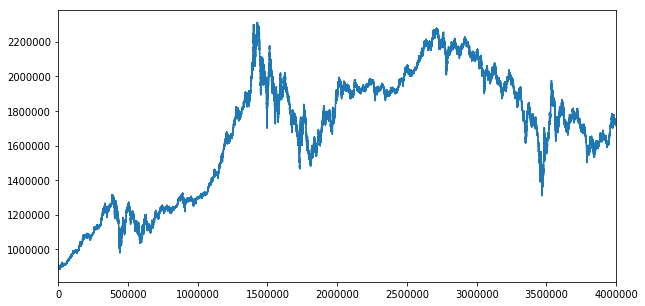

In [29]:
df.price.plot(figsize=(10, 5))

In [32]:

com = 0.15 / 100

trade_wait_limit = 400000

x = []
y = []

for wid10 in range(5, 100, 5):
    
    jpy = 40000
    btc = 0
    pre_trade_id = 0
    pre_buy = 0
    pre_sell = 99999999
    before = 0
    after = 0

    wid = wid10 / 1000
    x.append(wid)
    for i, v in enumerate(df.price[1500000:]):
        before = jpy + btc * v
        if jpy > 0 and v < pre_sell * (1 - wid):
            btc += jpy / (v * (1 + com))
            jpy = 0
            pre_buy = v
        elif btc > 0 and v > pre_buy * (1 + wid):
            jpy += btc * (v * (1 - com))
            btc = 0
            pre_sell = v
        else:
            if pre_trade_id + trade_wait_limit < i:
                pre_buy = 0
                pre_sell = 9999999
            continue
        pre_trade_id = i
        after = jpy + btc * v
#         x.append(i)
    y.append(after)
after

57805.354082751124

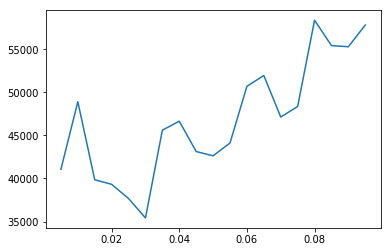

In [33]:
plt.plot(x, y)

In [10]:
df.loc[1500000]

id                                                  85270657
side                                                    SELL
price                                                1854040
size                                                    0.01
exec_date                         2017-12-08 05:53:24.417000
buy_child_order_acceptance_id      JRF20171208-055317-025282
sell_child_order_acceptance_id     JRF20171208-054518-773740
Name: 1500000, dtype: object